In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file = '../raw_data/train2.csv'
df_train = pd.read_csv(file)

In [5]:
df_train.shape

(28709, 2)

In [6]:
df_train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [7]:
file2 = '../raw_data/icml_face_data.csv'
df_icml = pd.read_csv(file2)

In [8]:
df_icml.shape

(35887, 3)

In [9]:
df_icml.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [10]:
df_icml.columns

Index(['emotion', ' Usage', ' pixels'], dtype='object')

In [11]:
df_icml.columns=['emotion', 'usage', 'pixels']

In [12]:
df_icml['usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [13]:
df_train = df_icml[df_icml['usage']=='Training']
df_train.shape

(28709, 3)

In [14]:
df_train.drop(columns='usage', inplace=True)
df_train.head()

/Users/doich/.pyenv/versions/3.8.6/envs/MusicWithEmotions/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [15]:
df_train.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [16]:
print(type(df_train.pixels[1]))
print(len(df_train.pixels[1]))
# plt.imshow(df_train.pixels[1],cmap='gray')

<class 'str'>
8687


In [17]:
test_str = df_train.pixels[1]
test_list = test_str.split(' ')
len(test_list)

2304

In [18]:
48*48

2304

In [19]:
test_l_reshaped = np.array(test_list).reshape(48,48).astype(int)
test_l_reshaped.shape

(48, 48)

In [20]:
# plt.imshow(test_l_reshaped, cmap='gray')
print(test_l_reshaped)

[[151 150 147 ... 129 140 120]
 [151 149 149 ... 122 141 137]
 [151 151 156 ... 109 123 146]
 ...
 [188 188 121 ... 185 185 186]
 [188 187 196 ... 186 182 187]
 [186 184 185 ... 193 183 184]]


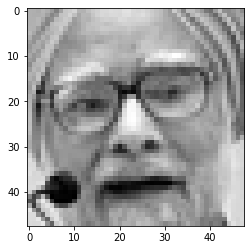

In [21]:
plt.imshow(test_l_reshaped, cmap='gray')

In [22]:
df_train.emotion[1]

0

In [23]:
emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

In [24]:
emotions.get(df_train.emotion[1])

'Angry'

In [25]:
df_train.isnull().sum()

emotion    0
pixels     0
dtype: int64

In [26]:
print(len(df_train))
df_droped = df_train.drop_duplicates(ignore_index=True)
print(len(df_droped))

28709
27515


In [27]:
df_droped.dtypes

emotion     int64
pixels     object
dtype: object

In [29]:
test_l_reshaped

array([[151, 150, 147, ..., 129, 140, 120],
       [151, 149, 149, ..., 122, 141, 137],
       [151, 151, 156, ..., 109, 123, 146],
       ...,
       [188, 188, 121, ..., 185, 185, 186],
       [188, 187, 196, ..., 186, 182, 187],
       [186, 184, 185, ..., 193, 183, 184]])

In [33]:
type(test_l_reshaped)

numpy.ndarray

In [36]:
test_l_reshaped.shape

(48, 48)

In [39]:
df1 = pd.DataFrame(test_l_reshaped)
df1.shape

(48, 48)

In [41]:
con1 = pd.concat([df1,df1])
con1.shape

(96, 48)

In [44]:
x = [test_l_reshaped, test_l_reshaped]

In [46]:
x_stack = np.dstack(x)
x_stack.shape

(48, 48, 2)

In [48]:
x_stacked_2 = np.rollaxis(x_stack,-1)
x_stacked_2.shape

(2, 48, 48)

In [50]:
x_stacked_2[0] == test_l_reshaped

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
test_l_reshaped

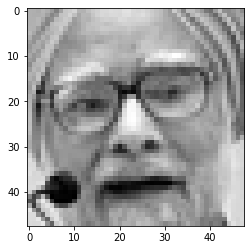

In [51]:
plt.imshow(x_stacked_2[0], cmap='gray')

In [53]:
pd.DataFrame(df_icml[:5]).to_csv('export.csv')